In [1]:
import numpy as np
import matplotlib.pyplot as plt

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y

def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2



-2.7809859839636073e-16


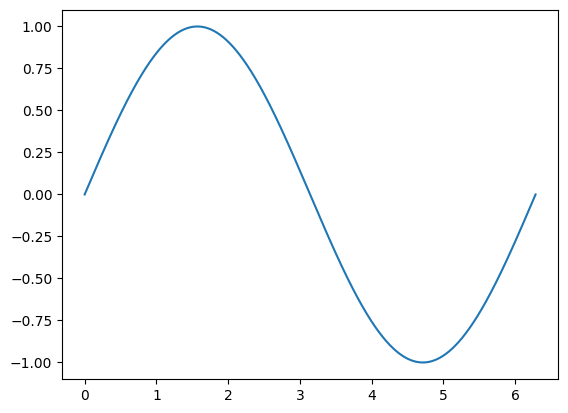

In [2]:
x1, y1 = np.loadtxt(r"Task1.3_Semicircle_high.txt", 
                    unpack=True, skiprows=1)

x1 = np.linspace(0,2*np.pi,10000)
y1 = np.sin(x1)
print(integrate(x1,y1))

plt.plot(x1,y1)
plt.show()

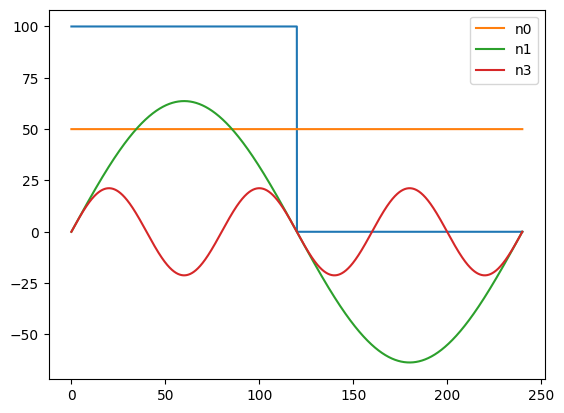

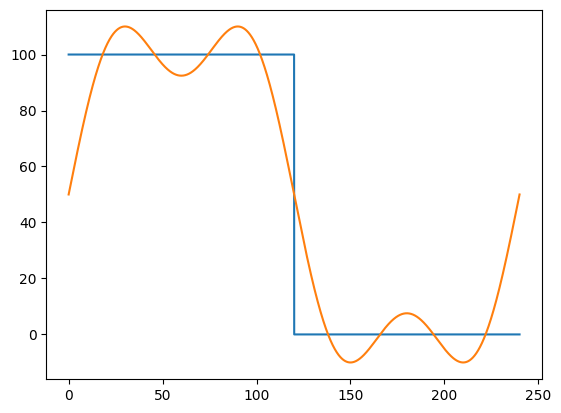

In [7]:
sq = square(50,50,240,100,0,240)
plt.plot(*sq)

x = sq[0]
length = len(x)

n0 = np.full(length, 50)
n1 = 200/np.pi*np.sin(2*np.pi/240*x)
n3 = 200/np.pi/3*np.sin(2*np.pi/80*x)

plt.plot(x,n0,label="n0")
plt.plot(x,n1,label="n1")
plt.plot(x,n3,label="n3")
plt.legend()
plt.show()

plt.plot(*sq)
plt.plot(x,n0+n1+n3)


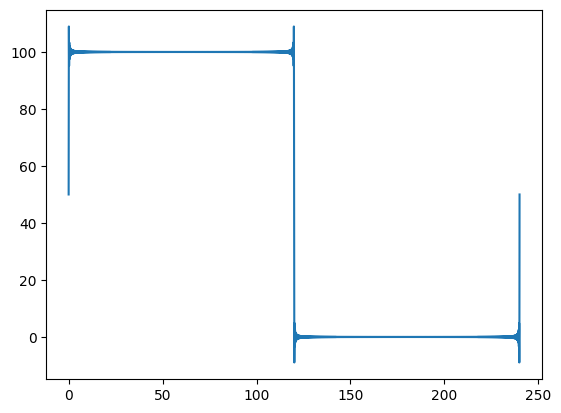

In [8]:
sq = square(50,50,240,1000,0,240)

x0 = sq[0]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)


for i in range(1,1000,2):
    cumalative += gen_sin(i)

plt.plot(x0,cumalative)

11 109.0650922021701
13 109.0342176380146
15 109.01420644526164
17 109.00049932763116
19 108.99070098007017
21 108.98345464038148
23 108.97794510806844
25 108.97365849187959
27 108.97025787164223
31 108.96527044389568
33 108.96341034588337
37 108.96053277601594
41 108.95843776100159
45 108.95686514996892
49 108.95565509354603
53 108.95470324130105
59 108.95361743303089
65 108.9528133009792
71 108.95220206481703
77 108.95172681017203
85 108.95124019860421
93 108.95087329208462
103 108.95052726957316
113 108.95026898384847
123 108.9500681732299
135 108.9498868821584
149 108.94972797834407
163 108.94960300714351
179 108.94949861169329
197 108.9494118959379
215 108.94934399232285
237 108.94927362473348
259 108.9492334601838
285 108.94918922559593
313 108.94914705230435
343 108.94911698507438
377 108.94910303456842
413 108.94907175940592
453 108.9490438860391
497 108.94905323868413
547 108.94904218050344
599 108.94903351909456
657 108.94900034693673
723 108.94890951381474
793 108.9489749905

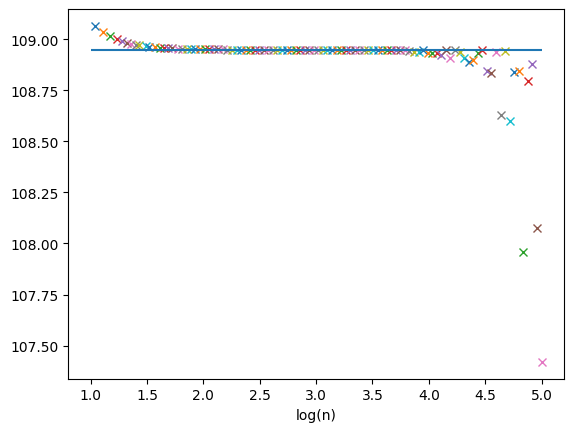

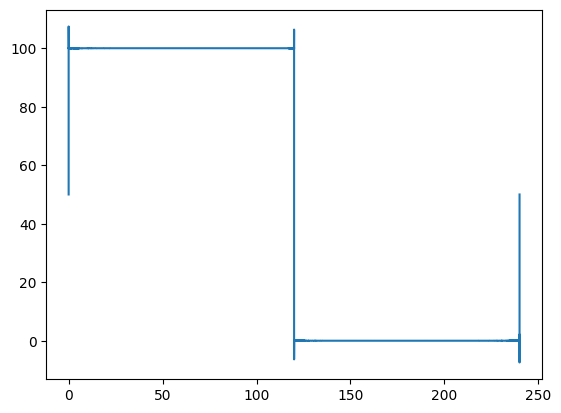

In [16]:
sq = square(50,50,240,1000,0,240)
#plt.plot(*sq)

x0 = sq[0]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 5

num = vect_int(np.logspace(1,max_power,100)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
        plt.plot(np.log10(i),max(cumalative),"x")
plt.hlines(108.94898,1,max_power)
plt.xlabel("log(n)")

plt.show()
plt.plot(x0,cumalative)






11 109.06509220303937
13 109.03421764546414
15 109.01420644612654
17 109.0004993492255
19 108.99070098093308
21 108.9834546411741
23 108.9779451089303
25 108.9736585338127
27 108.97025797647551
31 108.96527044475643
33 108.96341038805227
37 108.96053284619018
41 108.95843786571264
45 108.95686540082886
49 108.955655094406
53 108.95470369620013
59 108.95361743389064
65 108.95281375495988
71 108.95220251960374
77 108.95172685020844
85 108.95124083143715
93 108.95087354231003
103 108.95052821424741
113 108.95026969798835
123 108.95007119194634
135 108.94988834091014
149 108.94972797920347
163 108.94960690024834
179 108.94950160384921
197 108.94941234059894
215 108.94934444698136
237 108.94928146086934
259 108.94923374127829
285 108.94919087283724
313 108.94915618269154
343 108.94912799728425
377 108.94910381724578
413 108.94908444997024
453 108.94906787584
497 108.94905426401503
547 108.94904221886321
599 108.94903351995391
657 108.94902507099098
723 108.94901898727204
793 108.94901305997

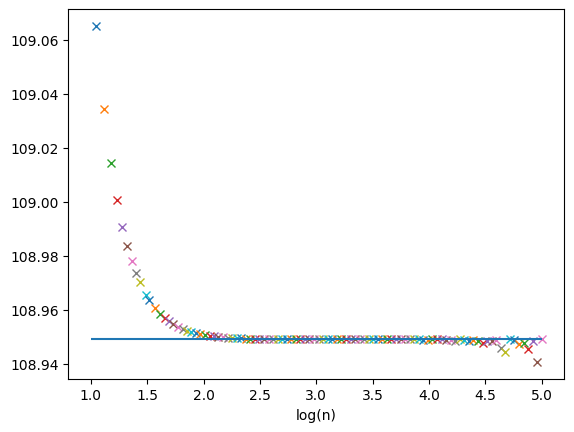

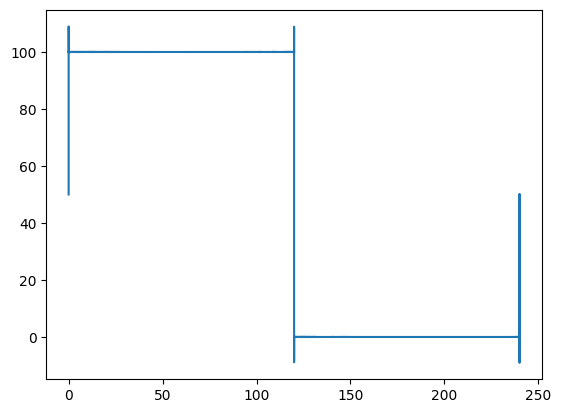

In [17]:
sq = square(50,50,240,10000,0,240)
#plt.plot(*sq)

x0 = sq[0]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 5

num = vect_int(np.logspace(1,max_power,100)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
        plt.plot(np.log10(i),max(cumalative),"x")
plt.hlines(108.94898,1,max_power)
plt.xlabel("log(n)")

plt.show()
plt.plot(x0,cumalative)






11 50.00999499998744
35 50.02998499864831
129 50.108279097515286
465 50.388135962125894
1669 51.39082328335114
5995 54.987343457946764
21545 67.63212123239981
77427 101.47412611134153
278255 108.94897142607122
1000001 108.94812074888735


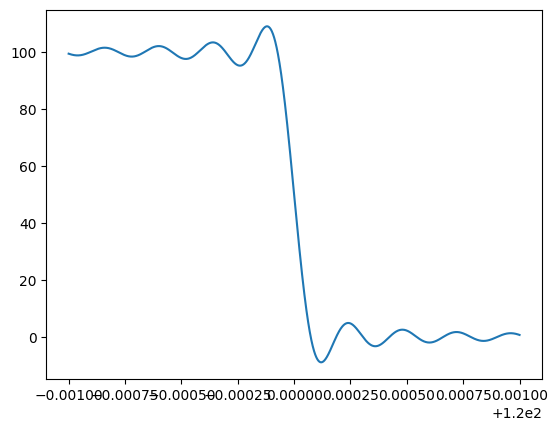

In [6]:
sq = square(50,50,240,1000000,0,240)
#plt.plot(*sq)

x0 = sq[0]
x0 = x0[int(len(x0)/2-1000):int(len(x0)/2)+1000]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 6

num = vect_int(np.logspace(1,max_power,10)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
plt.plot(x0,cumalative)



